# Softmax Regression from Scratch

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate Sample 3-Class Data
np.random.seed(42)

num_samples = 300
X1 = np.random.randn(num_samples//3, 2) + np.array([2, 2]) # Class 0
X2 = np.random.randn(num_samples//3, 2) + np.array([-2, -2]) # Class 1
X3 = np.random.randn(num_samples//3, 2) + np.array([2, -2]) # Class 2

X = np.vstack([X1, X2, X3])
y = np.array([0]*(num_samples//3) + [1]*(num_samples//3) + [2]*(num_samples//3))

# One-hot encode labels
def one_hot(y, num_classes):
    oh = np.zeros((len(y), num_classes))
    oh[np.arange(len(y)), y] = 1
    return oh

y_onehot = one_hot(y, 3)

# 2. Initialize Parameters
input_dim = 2
num_classes = 3
W = np.random.randn(input_dim, num_classes)
b = np.zeros((1, num_classes))
lr = 0.01
epochs = 1000

# 3. Softmax Function
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# 4. Loss Function
def cross_entropy_loss(y_true, y_pred):
    return -np.mean(np.sum(y_true * np.log(y_pred + 1e-10), axis=1))

# 5. Training Loop
losses = []
for epoch in range(epochs):
    # Forward Pass
    logits = np.dot(X, W) + b
    y_pred = softmax(logits)

    # Loss
    loss = cross_entropy_loss(y_onehot, y_pred)
    losses.append(loss)

    # Gradients
    dW = np.dot(X.T, (y_pred - y_onehot)) / X.shape[0]
    db = np.mean((y_pred - y_onehot), axis=0, keepdims=True)

    # Update
    W -= lr * dW
    b -= lr * db

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

# 6. Predictions
y_pred_class = np.argmax(y_pred, axis=1)
accuracy = np.mean(y_pred_class == y)
print("\nFinal Accuracy:", accuracy)

Epoch 0: Loss = 1.1012
Epoch 100: Loss = 0.2797
Epoch 200: Loss = 0.1839
Epoch 300: Loss = 0.1552
Epoch 400: Loss = 0.1419
Epoch 500: Loss = 0.1338
Epoch 600: Loss = 0.1281
Epoch 700: Loss = 0.1236
Epoch 800: Loss = 0.1199
Epoch 900: Loss = 0.1167

Final Accuracy: 0.9566666666666667


### Visualization

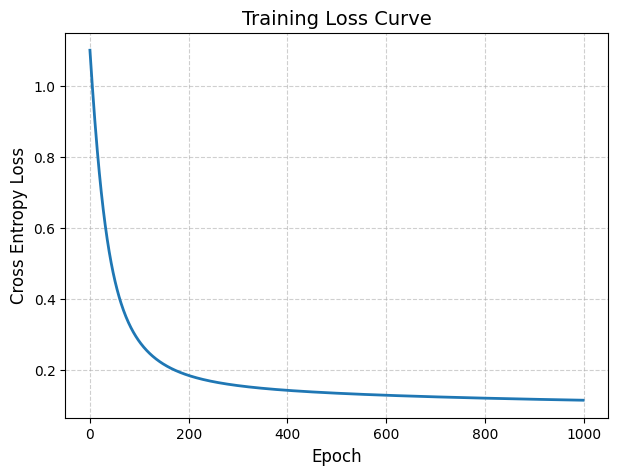

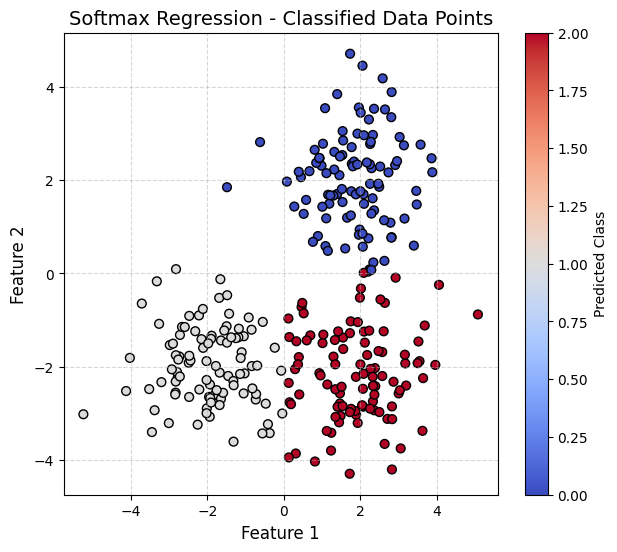

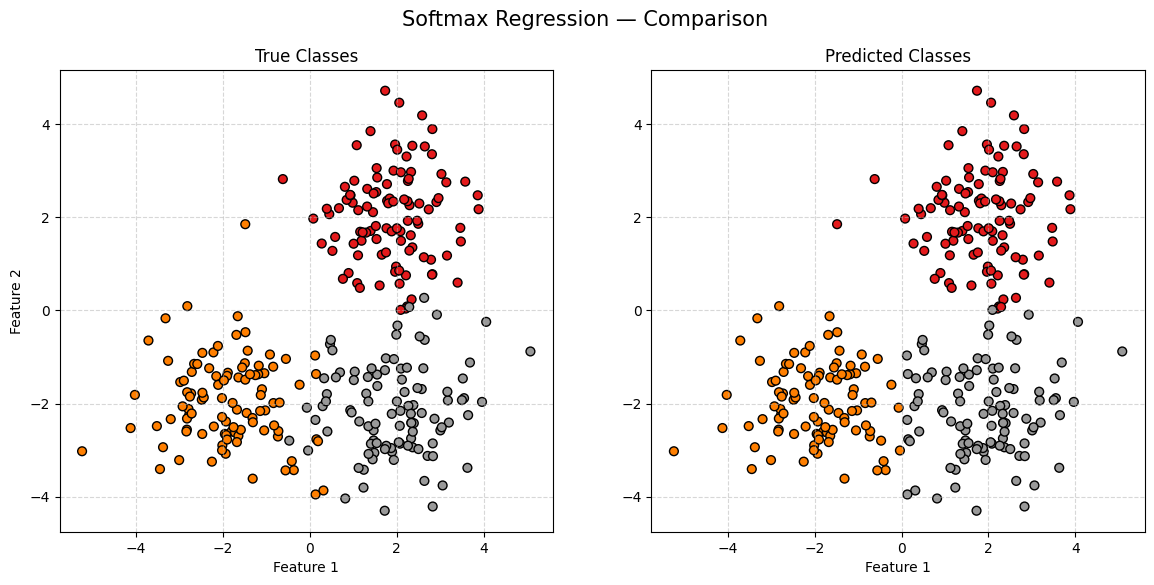

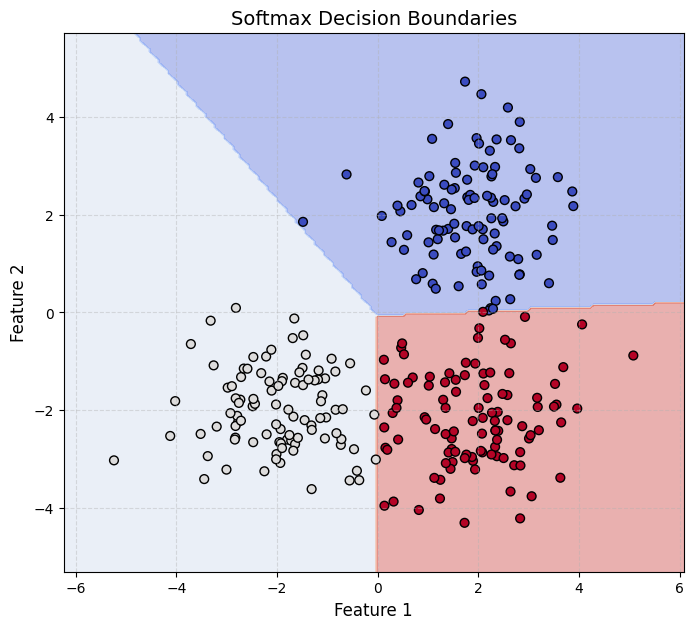

In [9]:
# 1. Loss Curve - Stylized

plt.figure(figsize=(7,5))
plt.plot(losses, linewidth=2)
plt.title("Training Loss Curve", fontsize=14)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Cross Entropy Loss", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# 2. Scatter: Predicted Classes
plt.figure(figsize=(7,6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y_pred_class, cmap="coolwarm", s=40, edgecolors="k")
plt.colorbar(scatter, label="Predicted Class")
plt.title("Softmax Regression - Classified Data Points", fontsize=14)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# 3. True Labels vs Predictions - Two Plots Side-by-Side
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# True Labels
axes[0].scatter(X[:,0], X[:,1], c=y, cmap="Set1", s=40, edgecolors="k")
axes[0].set_title("True Classes")
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")
axes[0].grid(True, linestyle="--", alpha=0.5)

# Predicted Labels
axes[1].scatter(X[:,0], X[:,1], c=y_pred_class, cmap="Set1", s=40, edgecolors="k")
axes[1].set_title("Predicted Classes")
axes[1].set_xlabel("Feature 1")
axes[1].grid(True, linestyle="--", alpha=0.5)

plt.suptitle("Softmax Regression — Comparison", fontsize=15)
plt.show()

# 4. Decision Boundary
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

grid = np.c_[xx.ravel(), yy.ravel()]
probs = softmax(np.dot(grid, W) + b)
Z = np.argmax(probs, axis=1).reshape(xx.shape)

plt.figure(figsize=(8,7))
plt.contourf(xx, yy, Z, alpha=0.4, cmap="coolwarm")
plt.scatter(X[:,0], X[:,1], c=y_pred_class, cmap="coolwarm", s=40, edgecolors="k")
plt.title("Softmax Decision Boundaries", fontsize=14)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()